In [18]:
import geopandas as gpd
import pandas as pd
import numpy as np
import tifffile as tf
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.features import geometry_mask
from rasterio import windows
import os
from shapely.geometry import mapping
from rasterio.mask import mask

In [34]:
#set directory to data
datadir = 'C:/Users/jtrum/world_bank/data/'

#load in tiff files (FD_1in5, 10, 20, 50, 75, 100, 200, 250, 500, 1000)
tif5 = tf.imread(datadir + 'AngolaFathom/Angola/fluvial_defended/FD_1in5.tif')
tif10 = tf.imread(datadir + 'AngolaFathom/Angola/fluvial_defended/FD_1in10.tif')
tif20 = tf.imread(datadir + 'AngolaFathom/Angola/fluvial_defended/FD_1in20.tif')
tif50 = tf.imread(datadir + 'AngolaFathom/Angola/fluvial_defended/FD_1in50.tif')
tif75 = tf.imread(datadir + 'AngolaFathom/Angola/fluvial_defended/FD_1in75.tif')
tif100 = tf.imread(datadir + 'AngolaFathom/Angola/fluvial_defended/FD_1in100.tif')
tif200 = tf.imread(datadir + 'AngolaFathom/Angola/fluvial_defended/FD_1in200.tif')
tif250 = tf.imread(datadir + 'AngolaFathom/Angola/fluvial_defended/FD_1in250.tif')
tif500 = tf.imread(datadir + 'AngolaFathom/Angola/fluvial_defended/FD_1in500.tif')
tif1000 = tf.imread(datadir + 'AngolaFathom/Angola/fluvial_defended/FD_1in1000.tif')
luanda = gpd.read_file(datadir + 'catchment.geojson')

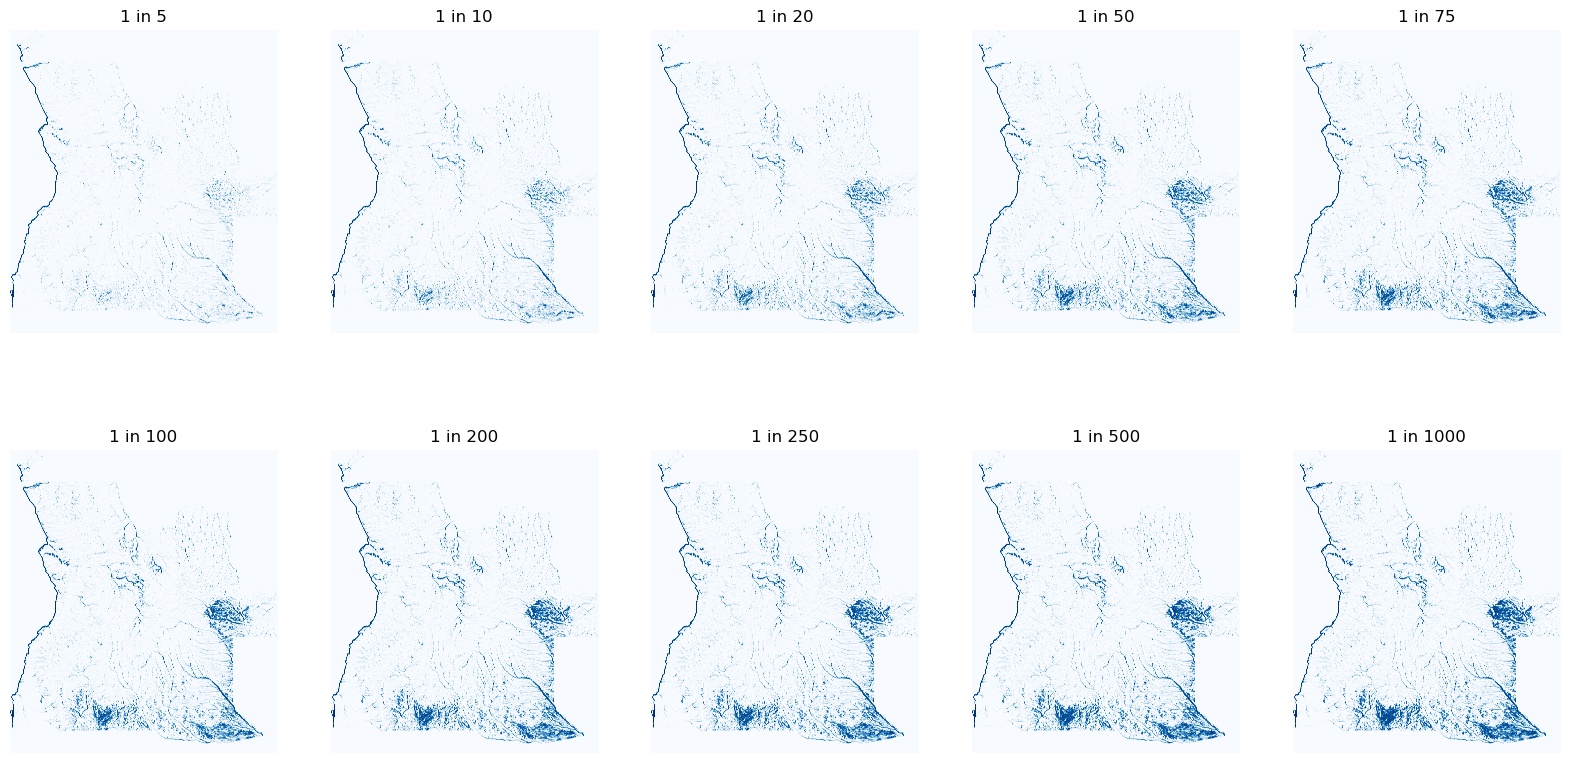

In [58]:
#make 10 plots of the 10 tiffs in a 2x5 grid with no axis labels
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
ax[0,0].imshow(tif5, cmap='Blues')
ax[0,1].imshow(tif10, cmap='Blues')
ax[0,2].imshow(tif20, cmap='Blues')
ax[0,3].imshow(tif50, cmap='Blues')
ax[0,4].imshow(tif75, cmap='Blues')
ax[1,0].imshow(tif100, cmap='Blues')
ax[1,1].imshow(tif200, cmap='Blues')
ax[1,2].imshow(tif250, cmap='Blues')
ax[1,3].imshow(tif500, cmap='Blues')
ax[1,4].imshow(tif1000, cmap='Blues')
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,2].axis('off')
ax[0,3].axis('off')
ax[0,4].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')
ax[1,2].axis('off')
ax[1,3].axis('off') 
ax[1,4].axis('off')
ax[0,0].set_title('1 in 5')
ax[0,1].set_title('1 in 10')
ax[0,2].set_title('1 in 20')
ax[0,3].set_title('1 in 50')
ax[0,4].set_title('1 in 75')
ax[1,0].set_title('1 in 100')
ax[1,1].set_title('1 in 200')
ax[1,2].set_title('1 in 250')
ax[1,3].set_title('1 in 500')
ax[1,4].set_title('1 in 1000')
plt.show()


In [64]:
#crop tif5 to the extent of the luanda geojson
luanda = luanda.to_crs('EPSG:4326')
luanda = luanda.geometry[0]
luanda = mapping(luanda)
luanda = [luanda]

#crop tif5 to the extent of the luanda geojson
with rio.open(datadir + 'AngolaFathom/Angola/fluvial_defended/FD_1in5.tif') as src:
    out_image, out_transform = mask(src, luanda, crop=True)
    out_meta = src.meta

#save the cropped tif5
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

#save the cropped tif5
with rio.open(datadir + 'AngolaFathom/Angola/fluvial_defended/FD_1in5_luanda.tif', "w", **out_meta) as dest:
    dest.write(out_image)

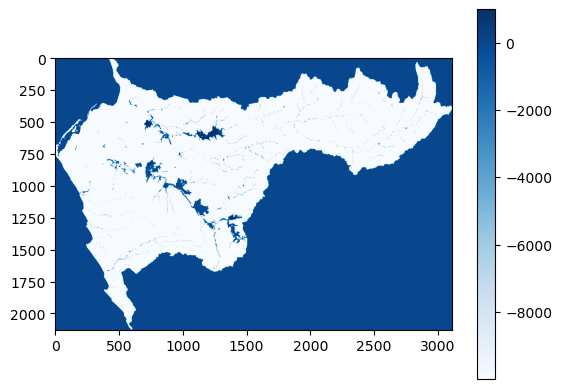

In [69]:
#load in the cropped tif5
tif5_cropped = tf.imread(datadir + 'AngolaFathom/Angola/fluvial_defended/FD_1in5_cropped.tif')

#plot the cropped tif5 with corresponding color bar
plt.imshow(tif5_cropped, cmap='Blues')
plt.colorbar()
plt.show()